# Deep Feed Forward Checkpoint

In [1]:
# First of all, we import all the python libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout

# 1. Data Exploration

### Import data

In [2]:
bank = pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### General information

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


This dataset has 11162 examples and 17 columns (**16 features** + the target variable **deposit**). 7 of the columns are integers and 10 are objects.

This dataset contains **banking marketing campaign data** and we can use it to optimize marketing campaigns to attract more customers to term **deposit subscription**.

Columns descriptions :

- **age**
- **sex**
- **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **education** : (categorical: primary, secondary, tertiary and unknown)
- **default** : has credit in default? (categorical: 'no','yes','unknown')
- **balance** : Balance of the individual.
- **housing** : has housing loan? (categorical: 'no','yes','unknown')
- **loan** : has personal loan? (categorical: 'no','yes','unknown')
- **contact** : contact communication type (categorical: 'cellular','telephone')
- **day** : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- **month** : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **duration** : last contact duration, in seconds (numeric).

- **campaign** : number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays** : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous** : number of contacts performed before this campaign and for this client (numeric)
- **poutcome** : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- **deposit** : has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
# Checking missing values
bank.isnull().sum().sum()

0

There are no missing values. Perfect!

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


- Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

- The mean balance is 1528. However, the Standard Deviation (std) is a high number (32225) so we can understand through this that the balance is heavily distributed across the dataset.

### Categorical features exploration

In [6]:
# We need to convert some columns to "category" type

cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

bank[cat_columns] = bank[cat_columns].astype("category")

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  int64   
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   default    11162 non-null  category
 5   balance    11162 non-null  int64   
 6   housing    11162 non-null  category
 7   loan       11162 non-null  category
 8   contact    11162 non-null  category
 9   day        11162 non-null  int64   
 10  month      11162 non-null  category
 11  duration   11162 non-null  int64   
 12  campaign   11162 non-null  int64   
 13  pdays      11162 non-null  int64   
 14  previous   11162 non-null  int64   
 15  poutcome   11162 non-null  category
 16  deposit    11162 non-null  object  
dtypes: category(9), int64(7), object(1)
memory usage: 797.6+ KB


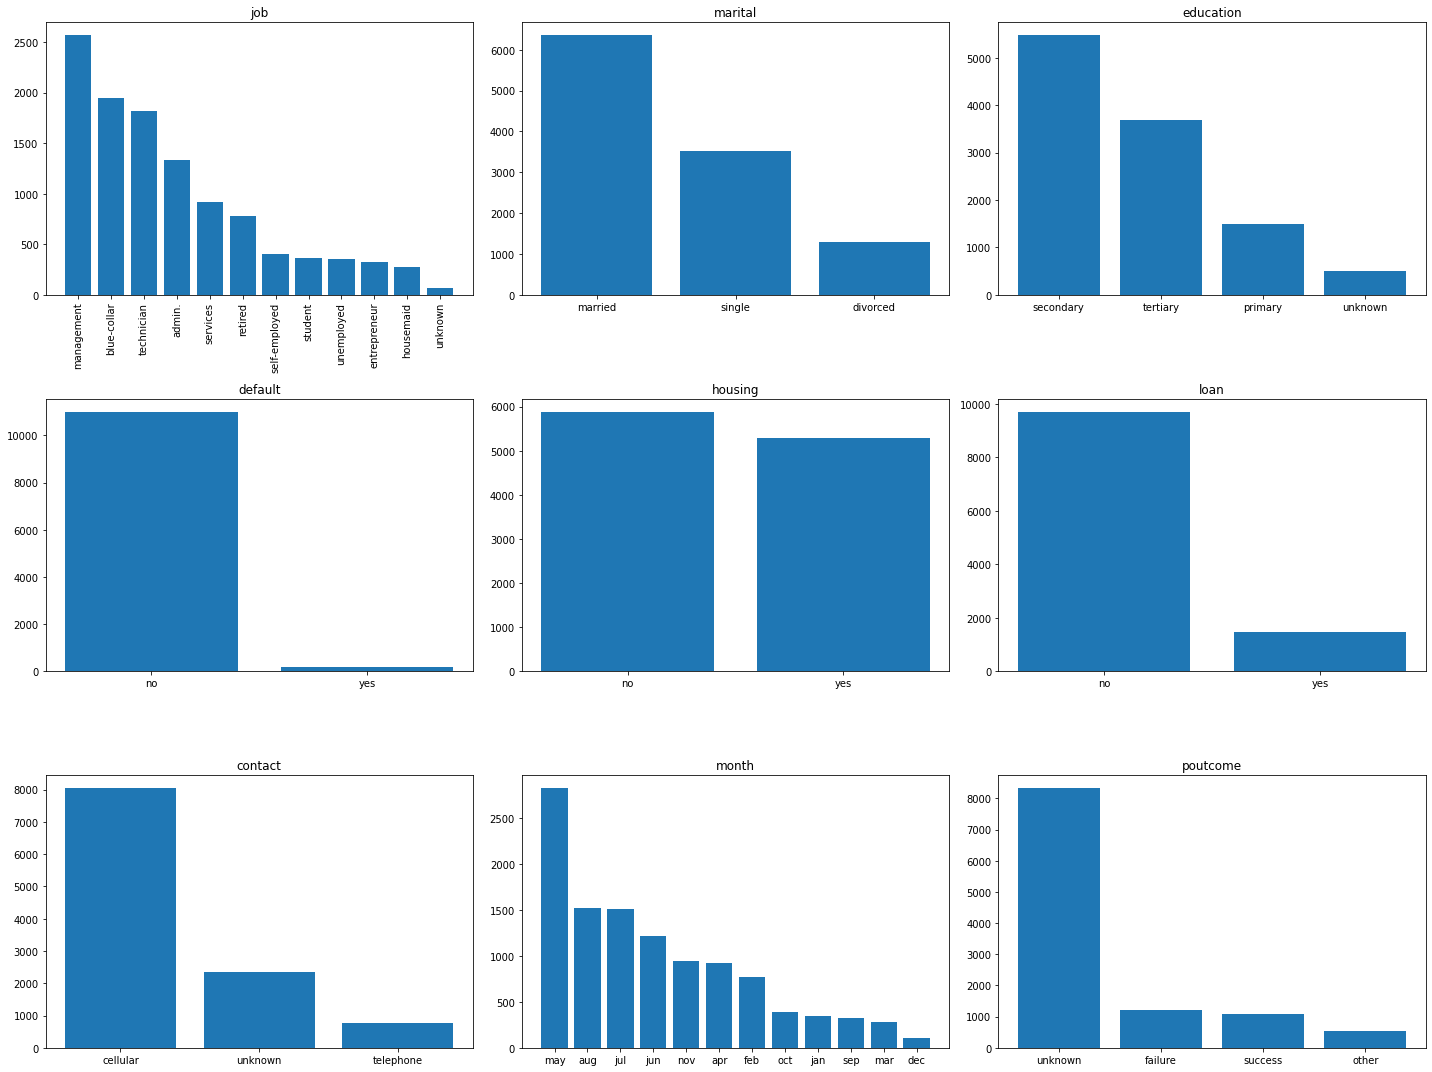

In [8]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bank[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    if cat_column == 'job':
        for tick in axs[trace_x, trace_y].get_xticklabels():
            tick.set_rotation(90)
    
    counter += 1

fig.tight_layout()

plt.show()

### Numerical features exploration

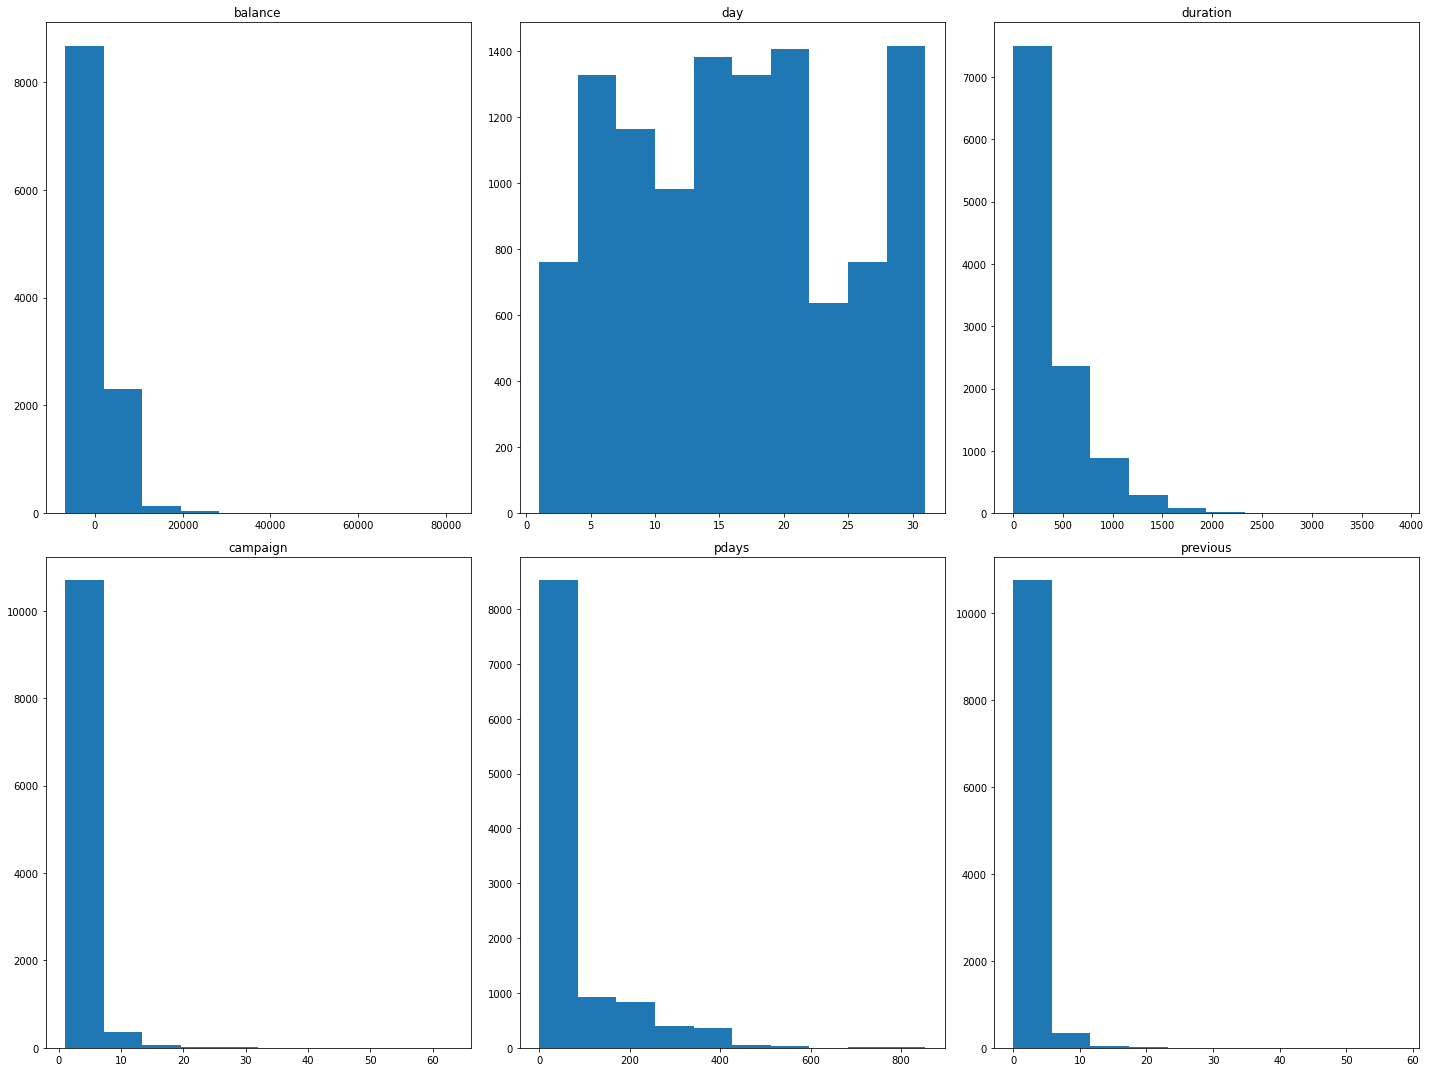

In [9]:
num_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(bank[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

fig.tight_layout()
    
plt.show()

We can detect some numerical features that have outliers especially **pdays**, **campaign** and **previous**. Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise.

Let's look closer at the values of **pdays**, **campaign** and **previous** columns:

In [10]:
bank[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


Percentage of **pdays** values above 400 :

In [11]:
len (bank[bank['pdays'] > 400] ) / len(bank) * 100

1.2005017022039062

**pdays** holds the number of days that passed by after the client was last contacted from a previous campaign. Looking closer into **pdays** data, we can see that:

- only 1.2% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.
- -1 possibly means that the client wasn't contacted before or stands for missing data.

Since we are not sure exactly what -1 means I suggest to drop this column, because -1 makes more than 50% of the values of the column.

Percentage of **campaign** values above 20 :

In [12]:
len (bank[bank['campaign'] > 34] ) / len(bank) * 100

0.035835871707579285

**campaign** holds the number of contacts performed during this campaign and for this client (numeric, includes last contact). 

Numbers for **campaign** above 34 are clearly noise, so I suggest to impute them with average campaign values while data cleaning.

Percentage of **previous** values above 20 :

In [13]:
len (bank[bank['previous'] > 34] ) / len(bank) * 100

0.04479483963447411

**previous** holds the number of contacts performed before this campaign and for this client (numeric).

Numbers for **previous** above 34 are also really strange, so I suggest to impute them with average campaign values while data cleaning.

### Analysis of the target variable "deposit"

First of all, we should look at the number of 'yes' and 'no' values in the target column 'deposit' :

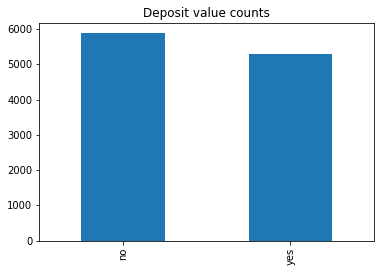

In [14]:
bank['deposit'].value_counts().plot.bar(title = 'Deposit value counts')
plt.show()

Perfect ! We see that counts for 'yes' and 'no' values for 'deposit' are close (balanced data), so we can use accuracy as a metric for a model which predicts the campaign outcome.

Let's see how **deposit** column value varies depending on other categorical columns values :

#### Deposit based on job feature

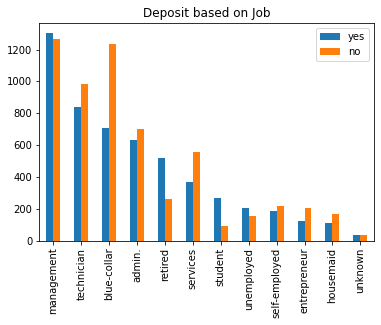

In [15]:
df = pd.DataFrame()

df['yes'] = bank[bank['deposit'] == 'yes']['job'].value_counts()
df['no'] = bank[bank['deposit'] == 'no']['job'].value_counts()

df.plot.bar(title = 'Deposit based on Job')
plt.show()

#### Deposit based on marital status

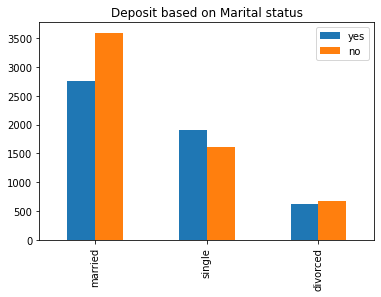

In [16]:
df = pd.DataFrame()

df['yes'] = bank[bank['deposit'] == 'yes']['marital'].value_counts()
df['no'] = bank[bank['deposit'] == 'no']['marital'].value_counts()

df.plot.bar(title = 'Deposit based on Marital status')
plt.show()

#### Deposit based on education

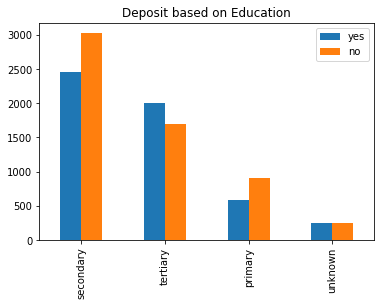

In [17]:
df = pd.DataFrame()

df['yes'] = bank[bank['deposit'] == 'yes']['education'].value_counts()
df['no'] = bank[bank['deposit'] == 'no']['education'].value_counts()

df.plot.bar(title = 'Deposit based on Education')
plt.show()

#### Deposit based on type of contact

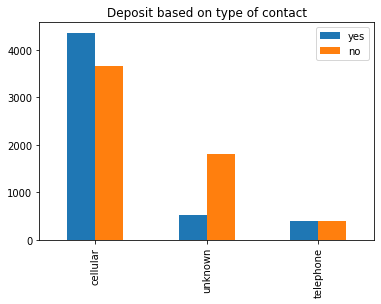

In [18]:
df = pd.DataFrame()

df['yes'] = bank[bank['deposit'] == 'yes']['contact'].value_counts()
df['no'] = bank[bank['deposit'] == 'no']['contact'].value_counts()

df.plot.bar(title = 'Deposit based on type of contact')
plt.show()

Regarding the diagrams we can tell that according to our dataset:

- Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
- Married customers are less likely to subscribe for term deposit.
- Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

Now let's look how numerical columns affect term **deposit** subscription.

#### Deposit based on Age and balance

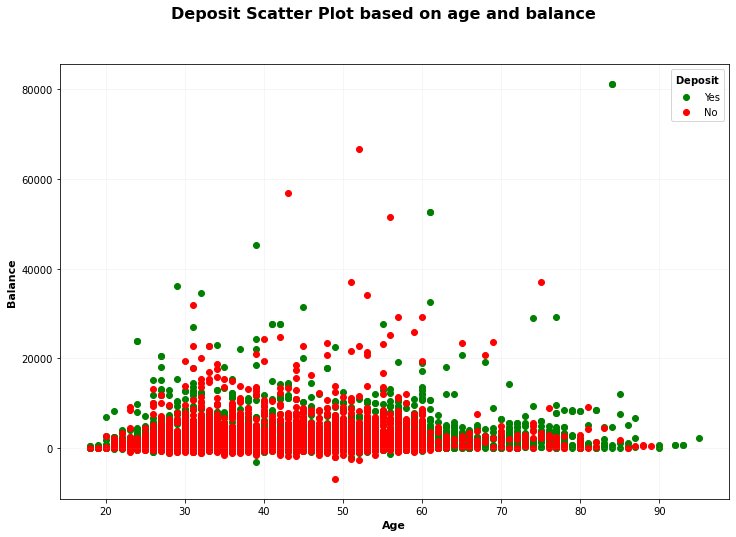

In [19]:
fig = plt.figure(figsize = (12,8))
fig.suptitle("Deposit Scatter Plot based on age and balance", fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif')
plt.scatter(x = bank.age[bank.deposit=='yes'], y = bank.balance[(bank.deposit=='yes')], c = "green")
plt.scatter(x = bank.age[bank.deposit=='no'], y = bank.balance[(bank.deposit=='no')], c = "red")
plt.legend(['Yes', 'No'], title = '$\\bf{Deposit}$', fontsize = '10', 
           title_fontsize = '10', loc = 'upper right', frameon = True)
plt.xlabel('Age', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif')
plt.ylabel('Balance', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.grid(axis = 'both', alpha = 0.2, lw = 0.5)
plt.show()

#### Deposit based on Age and number of previous contacts

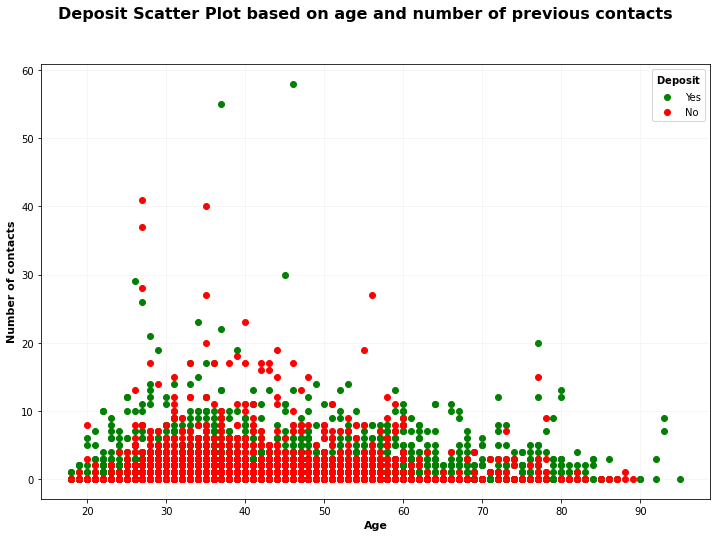

In [20]:
fig = plt.figure(figsize = (12,8))
fig.suptitle("Deposit Scatter Plot based on age and number of previous contacts", fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif')
plt.scatter(x = bank.age[bank.deposit=='yes'], y = bank.previous[(bank.deposit=='yes')], c = "green")
plt.scatter(x = bank.age[bank.deposit=='no'], y = bank.previous[(bank.deposit=='no')], c = "red")
plt.legend(['Yes', 'No'], title = '$\\bf{Deposit}$', fontsize = '10', 
           title_fontsize = '10', loc = 'upper right', frameon = True)
plt.xlabel('Age', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif')
plt.ylabel('Number of contacts', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.grid(axis = 'both', alpha = 0.2, lw = 0.5)
plt.show()

Looking at the scatter plots above, we can conclude that:

- People who subscribed for term deposit tend to have greater balance and age values.
- People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

### Correlation Map

Below is correlation map/heatmap of numerical variables to show correlation level/values for each variables with others.

In [21]:
# Convert deposit column to numerical
bank.deposit = bank.deposit.replace(['yes','no'],[1,0])

In [22]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


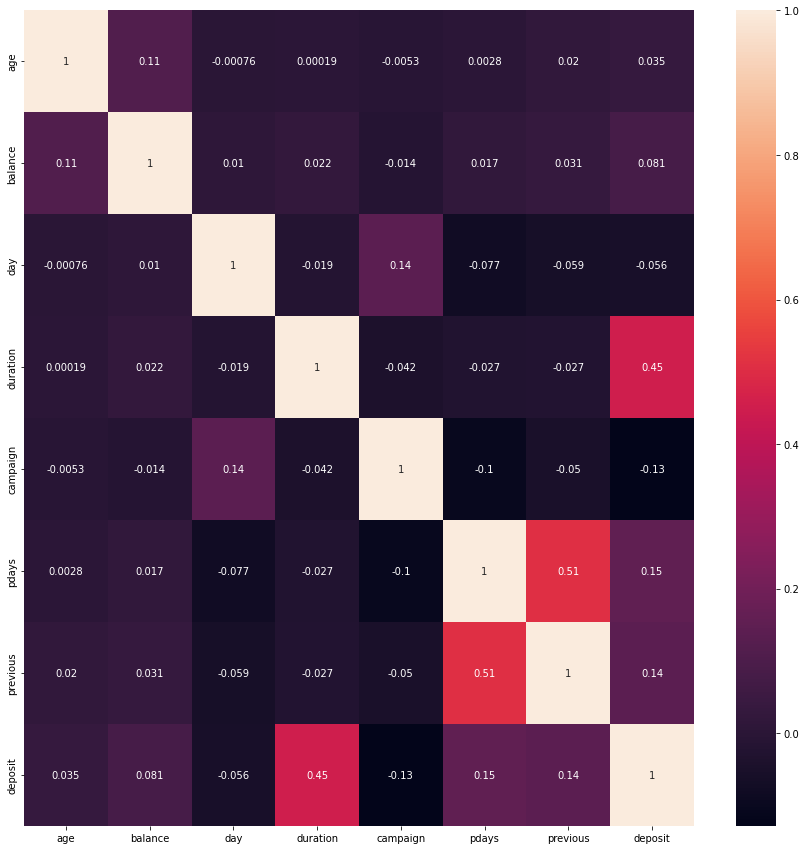

In [23]:
corr = bank.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True)
plt.show()

We can see that the target variable **deposit** is highly correlated to the **duration** feature.

## 2. Data cleaning

Before we will be able to apply our deep learning neural network, we should prepare the dataset for processing.

First, we will convert categorical columns into dummy variables.

#### One-Hot Encoding

In [24]:
# --- Creating Dummy Variables for cp, thal and slope ---

job = pd.get_dummies(bank['job'], prefix = 'job')
marital = pd.get_dummies(bank['marital'], prefix = 'marital')
education = pd.get_dummies(bank['education'], prefix = 'education')
default = pd.get_dummies(bank['default'], prefix = 'default')
housing = pd.get_dummies(bank['housing'], prefix = 'housing')
loan = pd.get_dummies(bank['loan'], prefix = 'loan')
contact = pd.get_dummies(bank['contact'], prefix = 'contact')
month = pd.get_dummies(bank['month'], prefix = 'month')
poutcome = pd.get_dummies(bank['poutcome'], prefix = 'poutcome')

# --- Merge Dummy Variables to Main Data Frame ---

frames = [bank, job, marital, education, default, housing, loan, contact, month, poutcome]
bank = pd.concat(frames, axis = 1)

In [25]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


#### Dropping Unnecessary Variables

The variables that unnecessary will be deleted.

In [26]:
bank.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome'], 
          inplace = True)

In [27]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


#### Features Separating

In [28]:
X = bank.drop(['deposit'], axis = 1)
y = bank['deposit']

#### Data Normalization
We will use **min-max normalization**.

In [29]:
# --- Data Normalization using Min-Max Method ---
X = MinMaxScaler().fit_transform(X)

#### Splitting the Dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# 3. Deep Learning Network

### Building Model

In [31]:
model = Sequential([
    Dense(256, activation = 'relu'),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [33]:
history_model = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/20
447/447 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.7354 - val_loss: 0.4275 - val_accuracy: 0.8096
Epoch 2/20
447/447 [==============================] - 1s 1ms/step - loss: 0.4166 - accuracy: 0.8158 - val_loss: 0.3917 - val_accuracy: 0.8214
Epoch 3/20
447/447 [==============================] - 1s 1ms/step - loss: 0.3842 - accuracy: 0.8317 - val_loss: 0.3762 - val_accuracy: 0.8415
Epoch 4/20
447/447 [==============================] - 1s 1ms/step - loss: 0.3680 - accuracy: 0.8435 - val_loss: 0.3764 - val_accuracy: 0.8421
Epoch 5/20
447/447 [==============================] - 1s 1ms/step - loss: 0.3585 - accuracy: 0.8505 - val_loss: 0.3795 - val_accuracy: 0.8376
Epoch 6/20
447/447 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.8513 - val_loss: 0.3722 - val_accuracy: 0.8438
Epoch 7/20
447/447 [==============================] - 1s 1ms/step - loss: 0.3371 - accuracy: 0.8554 - val_loss: 0.4041 - val_accuracy: 0.8281
Epoch 

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               13312     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


### Evaluation

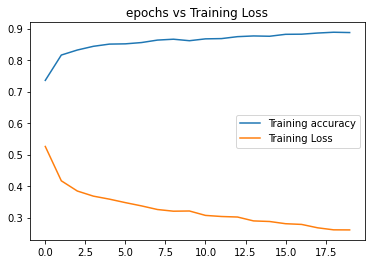

In [35]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label = 'Training accuracy')
plt.plot(count, train_loss, label = 'Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()
plt.show()

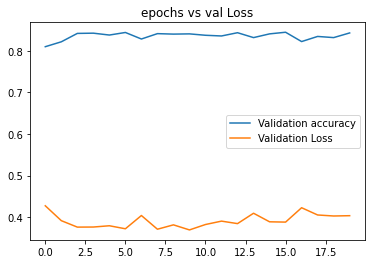

In [36]:
val_accuracy = history_model.history['val_accuracy']
val_loss = history_model.history['val_loss']
plt.plot(count, val_accuracy, label = 'Validation accuracy')
plt.plot(count, val_loss, label = 'Validation Loss')
plt.title('epochs vs val Loss')
plt.legend()
plt.show()

In [37]:
predictions = model.evaluate(X_test, y_test)

print ("\nLoss = " + str(predictions[0]))
print ("Test Accuracy = " + str(predictions[1]))

70/70 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8419

Loss = 0.4004031717777252
Test Accuracy = 0.8419166803359985


In [38]:
y_pred = model.predict(X_test)

y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1

y_pred = y_pred.astype('int')

70/70 [==============================] - 0s 1ms/step


In [39]:
y_pred = [i[0] for i in y_pred]

### Confusion matrix

In [40]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[914 232]
 [121 966]]
